In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import dill as pickle
import os, sys
import scipy.interpolate as intp
import bead_util as bu
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
%matplotlib inline

sys.path.append('../profiles/')
from symmetric_attractor_profile import attractor_profile
sys.path.append('../analysis/')
from holes_analysis import holes_data, holes_analysis

parent = '/home/emmetth/gravity_sim'
os.chdir(parent)

In [11]:
full_path = parent+'/sim_data/slots1/'

slots = holes_data(data_dir=full_path)
data = slots.data

angulars = sorted(slots.hrs)
radials = sorted(slots.from_edges)

In [63]:
radials

[2.5, 6.25, 10.0, 13.75, 17.5, 21.25, 25.0, 80.0]

In [64]:
p0 = 7,13.75,13.75,20.0,5.0
test_analysis = holes_analysis(data, p0)

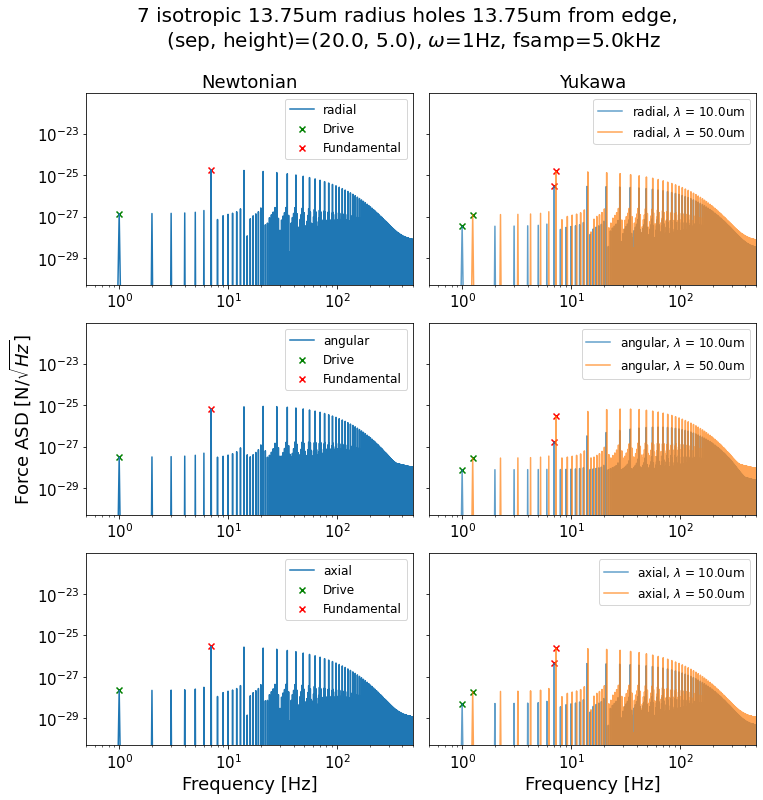

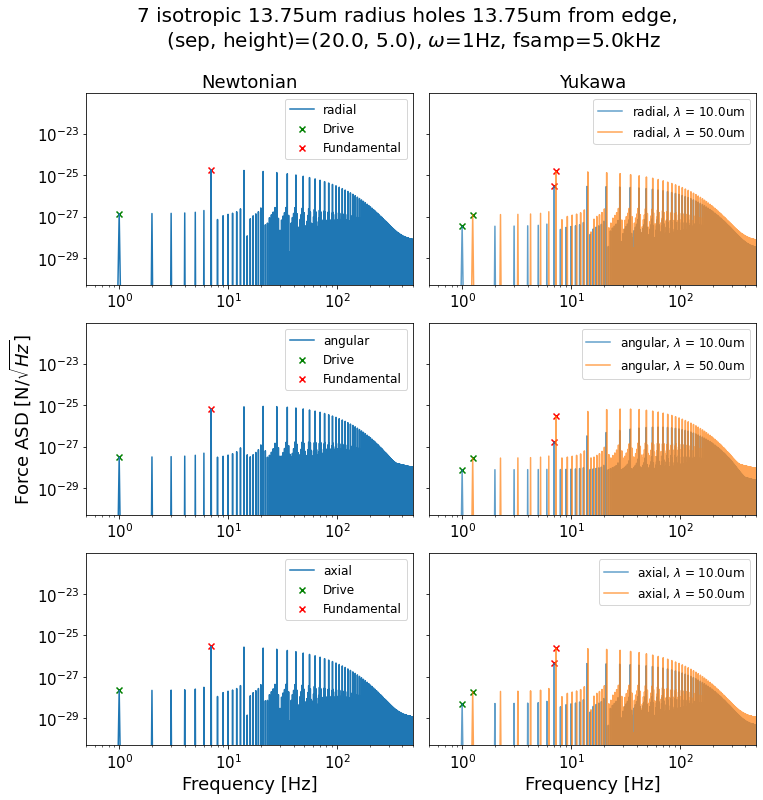

In [86]:
test_analysis.plot_asd()

In [70]:
harms_rad = np.zeros((len(radials), len(angulars), 3))
sep, height = 20.0,5.0

for i,rad in enumerate(radials):
    for j,ang in enumerate(angulars):
        p = 7,rad,ang,sep,height
        FM = holes_analysis(data, p)
        harms = FM.sum_harmonics(w=1, fsamp=5e3, num_harmonics=10)
        harms_rad[i,j,:] = harms[:,0]

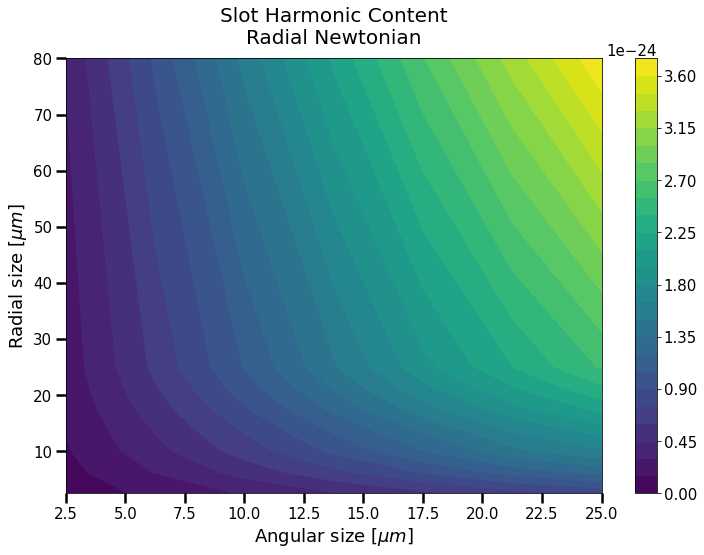

In [78]:
plt.rcParams['figure.figsize'] = (12,8)
plt.contourf(angulars, radials, harms_rad[:,:,0], levels=25)
plt.colorbar()
plt.xlabel('Angular size [$\mu m$]', fontsize=18)
plt.ylabel('Radial size [$\mu m$]', fontsize=18)
plt.title('Slot Harmonic Content\nRadial Newtonian', fontsize=20, y=1.02)
plt.tick_params('both', length=10, width=2.5, which='major', labelsize=15)
plt.tick_params('both', length=10, width=2.5, which='minor')
# plt.savefig('slots_ang_rad.png', dpi=150)
plt.show()

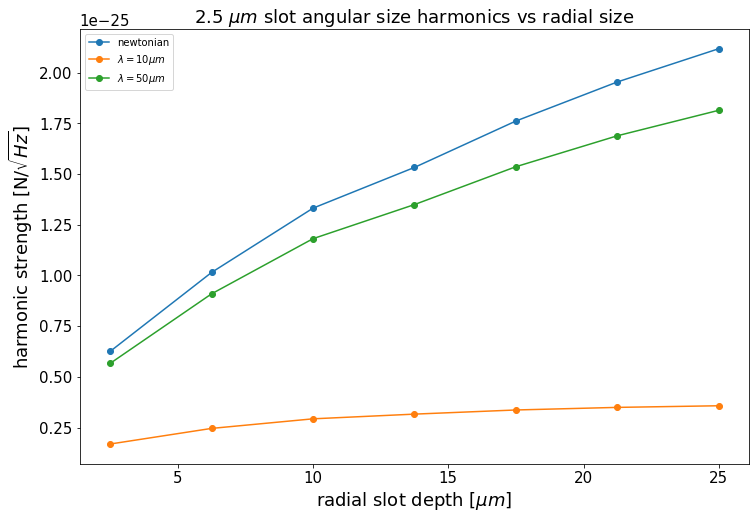

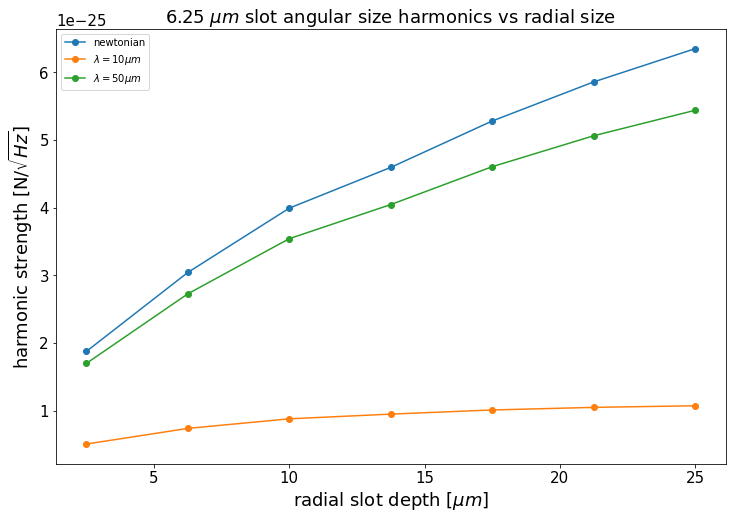

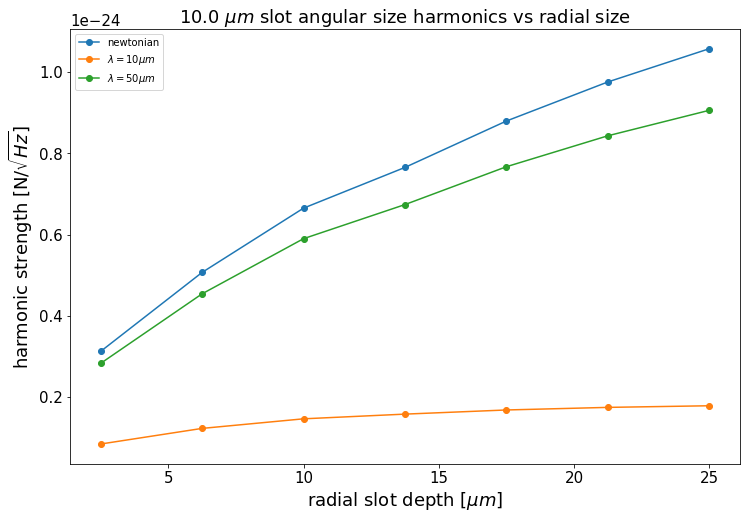

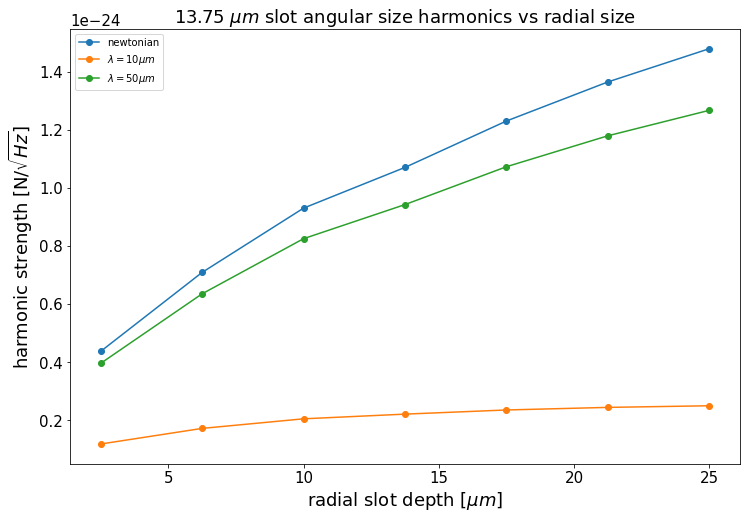

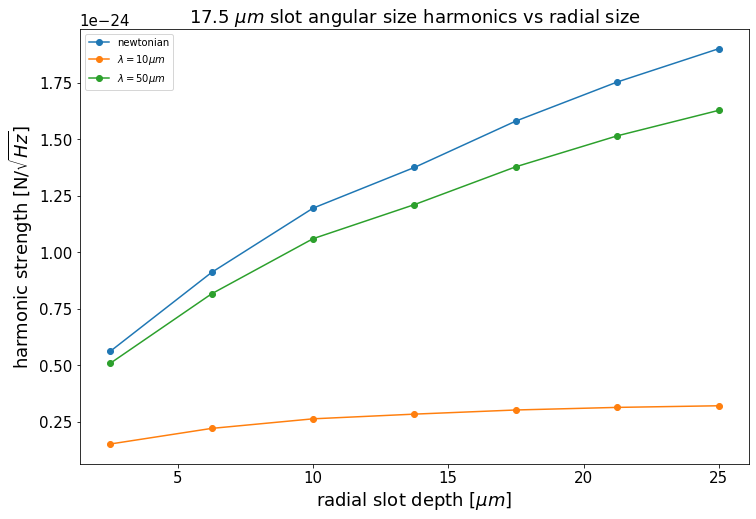

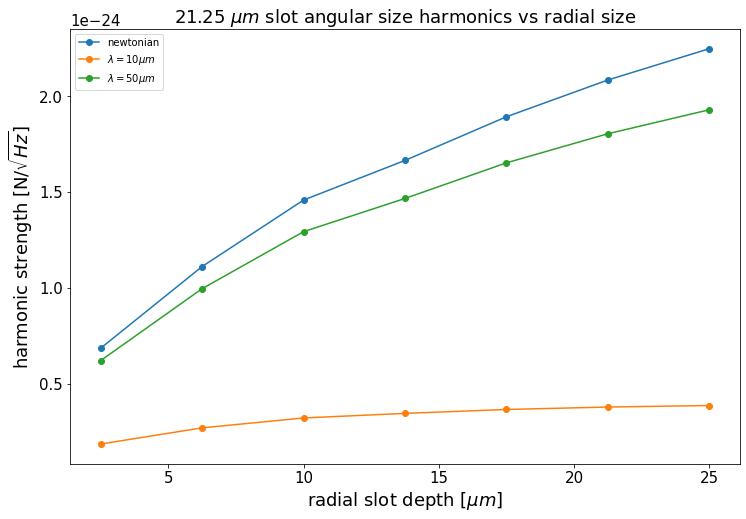

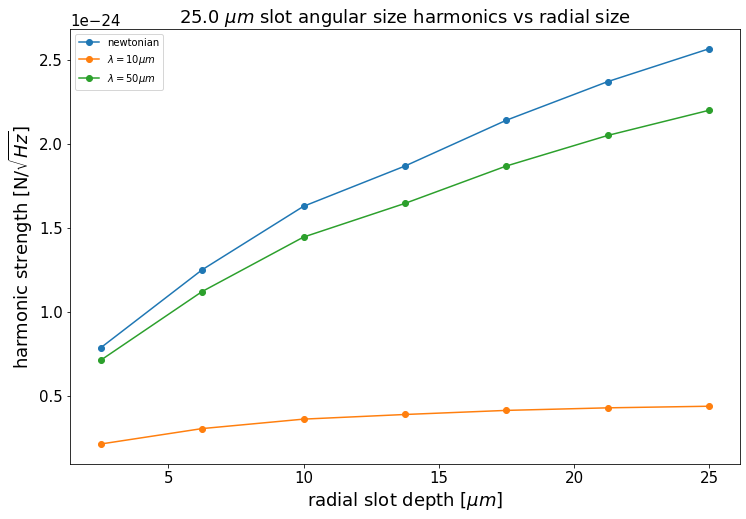

In [81]:
for i,ang in enumerate(angulars):
    plt.plot(radials[:-1], harms_rad[:-1,i,:], 'o-')
    plt.legend(['newtonian', '$\lambda=10\mu m$', '$\lambda=50\mu m$'])
    plt.xlabel('radial slot depth [$\mu m$]', fontsize=18)
    plt.ylabel('harmonic strength [N/$\sqrt{Hz}$]', fontsize=18)
    plt.title(f'{ang} $\mu m$ slot angular size harmonics vs radial size', fontsize=18)
    if ang == 21.25:
        plt.savefig('21,25_ang.png', dpi=150)
    plt.show()

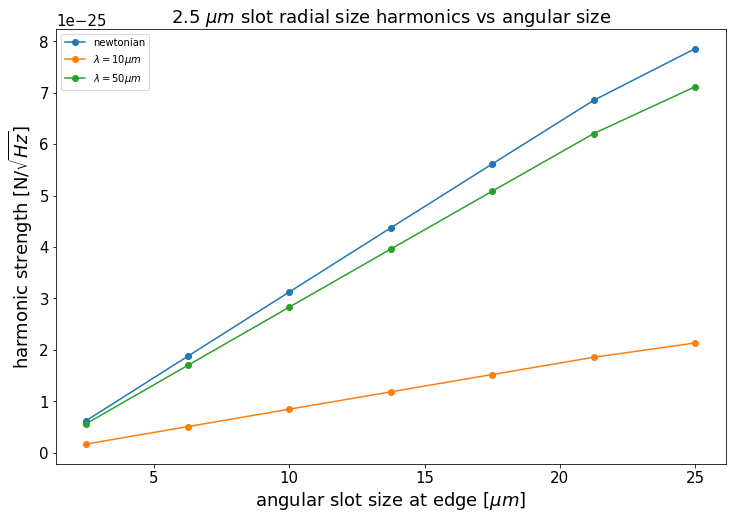

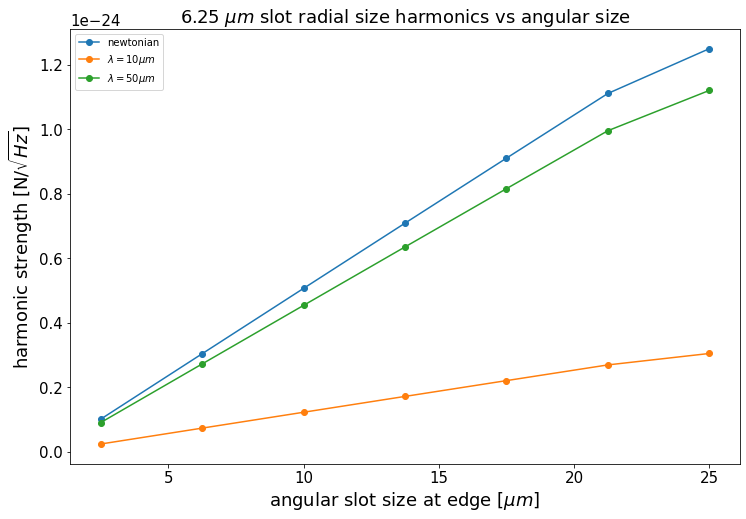

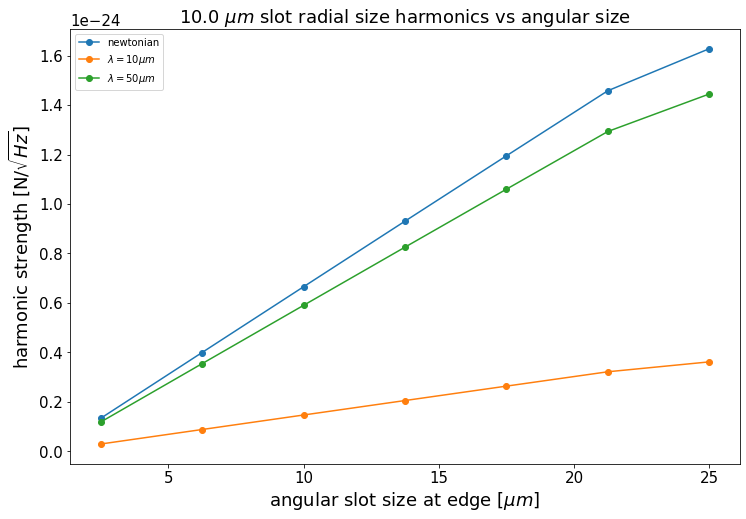

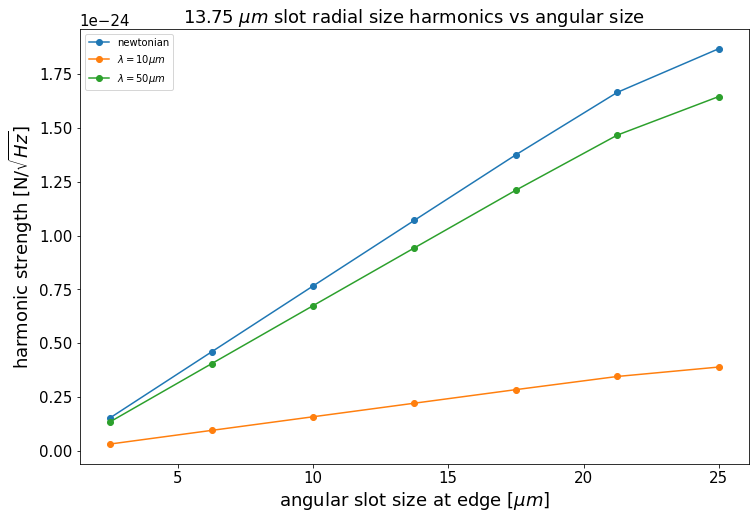

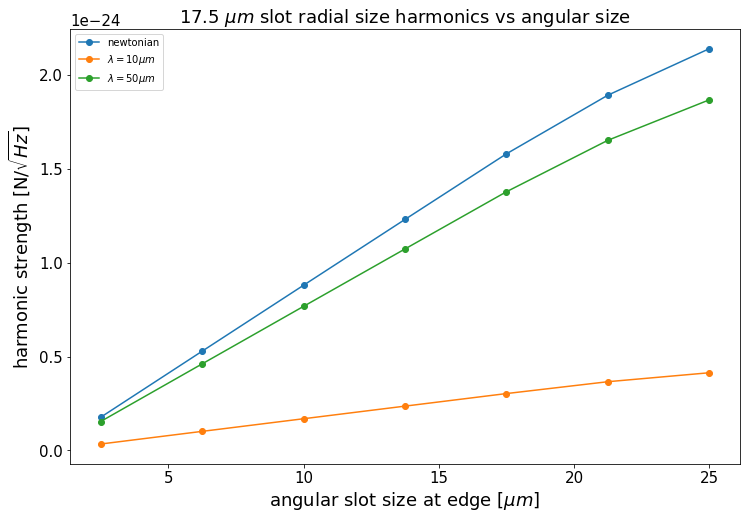

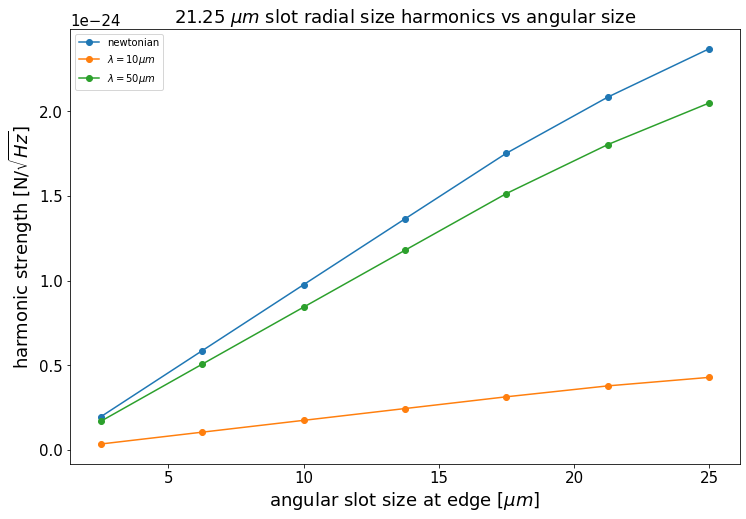

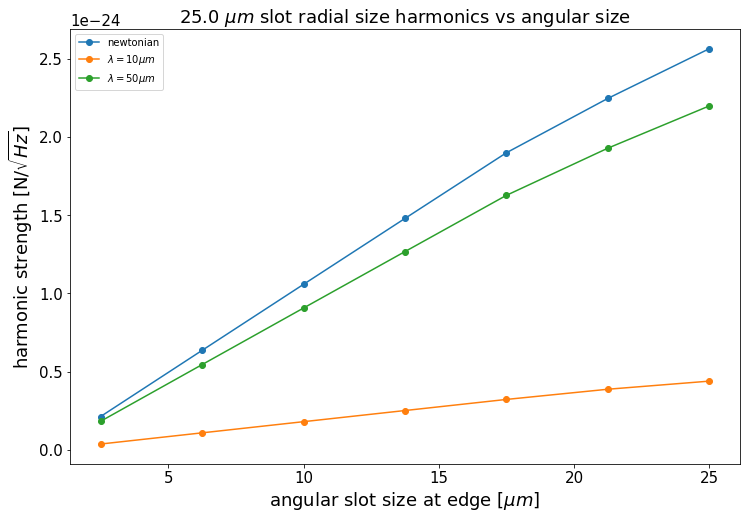

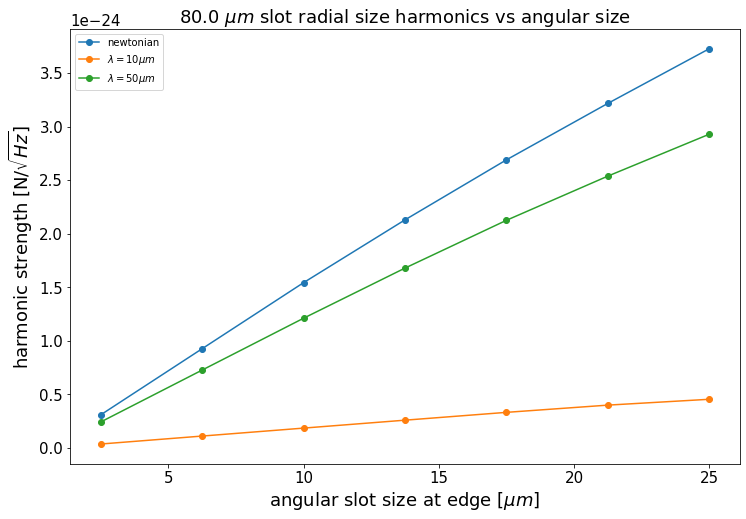

In [83]:
for i,rad in enumerate(radials):
    plt.plot(angulars, harms_rad[i,:,:], 'o-')
    plt.legend(['newtonian', '$\lambda=10\mu m$', '$\lambda=50\mu m$'])
    plt.xlabel('angular slot size at edge [$\mu m$]', fontsize=18)
    plt.ylabel('harmonic strength [N/$\sqrt{Hz}$]', fontsize=18)
    plt.title(f'{rad} $\mu m$ slot radial size harmonics vs angular size', fontsize=18)
    if rad == 21.25:
        plt.savefig('21,25_rad.png', dpi=150)
    plt.show()